# NLP for Public Policy - Joy and Liam

## Part 1: Preprocessing and EDA

### 1.1 Import the training data
Data come from Patwa, P., Sharma, S., Pykl, S., Guptha, V., Kumari, G., Akhtar, M. S., Ekbal, A., Das, A., & Chakraborty, T. (2021). Fighting an Infodemic: COVID-19 Fake News Dataset. CONSTRAINT@AAAI. https://doi.org/10.1007/978-3-030-73696-5_3. The dataset used contains 8,560 English-language tweets on COVID-19 with real and fake labels. Fake tweets were collected from fact-checking websites including Politifact, NewsChecker, Boomlive, Google fact-check-explorer and IFCN chatbot, while real news was collected from Twitter using verified handles (Patwa et al., 2021).





In [1]:
import pandas as pd
import numpy as np
import nltk

#Read in the data, separate into X (features) and y (labels)
rawdata = pd.read_csv("https://raw.githubusercontent.com/ltk2118/covid_misinformation/main/Constraint_Full.csv")

#Use pre-defined columns for training and test data
X = list(rawdata['tweet'])
y = list(rawdata['label'])

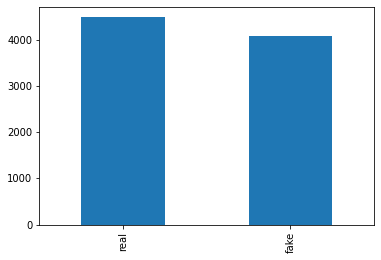

In [2]:
import matplotlib.pyplot as plt
rawdata['label'].value_counts().plot(kind='bar')

### 1.2 Examples of real and fake tweets

In [3]:
rawdata[rawdata['label']=='real']['tweet'].head(5)

0    The CDC currently reports 99031 deaths. In gen...
1    States reported 1121 deaths a small rise from ...
3    #IndiaFightsCorona: We have 1524 #COVID testin...
4    Populous states can generate large case counts...
5    Covid Act Now found "on average each person in...
Name: tweet, dtype: object

In [4]:
rawdata[rawdata['label']=='fake']['tweet'].head(5)

2     Politically Correct Woman (Almost) Uses Pandem...
7     Obama Calls Trump’s Coronavirus Response A Cha...
8     ???Clearly, the Obama administration did not l...
9     Retraction—Hydroxychloroquine or chloroquine w...
11    The NBA is poised to restart this month. In Ma...
Name: tweet, dtype: object

### 1.3 Which type of tweet is longer

In [5]:
print("Fake tweets", round(rawdata[rawdata['label']=='fake']['tweet'].apply(len).mean(),2))
print("Real tweets", round(rawdata[rawdata['label']=='real']['tweet'].apply(len).mean(),2))

Fake tweets 144.16
Real tweets 217.33


### 1.4 Define function for preprocessing the tweet text

In [6]:
from nltk.corpus import wordnet as wn
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import WhitespaceTokenizer, pos_tag
from collections import defaultdict
import re

#Download additional libraries as needed
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

#Use mapping for wordnet -- treebank POS tags
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

#use wordnet lemmatizer and ntlk stopwords
lemmatizer = WordNetLemmatizer()
cachedStopWords = stopwords.words("english")

#define function for lemmatization of tweets, removal of stopwords and twitter hyperlinks
def lemmatize_and_clean(tweet):
    tweet = tweet.lower() 
    tweet = re.sub(r'(https*:\/\/t\.co.*?)(?:\s)','',tweet) #remove hyperlinks in middle of tweet
    tweet = re.sub(r'(https*:\/\/t\.co.*?)$','',tweet) #remove hyperlinks at end of tweet
    tweet = re.sub(r'[^\x00-\x7F]+', '', tweet) #remove non-english characters
    tweet = re.sub(r'&amp','',tweet) #remove ampersands
    tweet = re.sub(r'[.|,|:|;|`|!|)|(|ー|_|?]','',tweet) #remove various punctuations that are not informative
    tweet = ' '.join([word for word in tweet.split() if word not in cachedStopWords]) #remove stopwords
    tokens = WhitespaceTokenizer().tokenize(tweet) #use whitespace tokenizer to preserve hashtags (instead of word tokenizer)
    return [lemmatizer.lemmatize(token, tag_map[tag[0]]) for token, tag in pos_tag(tokens)] #return lemmatized tweet

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [7]:
#An example of the lemmatize-clean function on a random tweet
print(rawdata[rawdata['label']=='real']['tweet'][12])
print(lemmatize_and_clean(rawdata[rawdata['label']=='real']['tweet'][12]))

We just announced that the first participants in each age cohort have been dosed in the Phase 2 study of our mRNA vaccine (mRNA-1273) against novel coronavirus. Read more: https://t.co/woPlKz1bZC #mRNA https://t.co/9VGUoJu5cS
['announce', 'first', 'participant', 'age', 'cohort', 'dose', 'phase', '2', 'study', 'mrna', 'vaccine', 'mrna-1273', 'novel', 'coronavirus', 'read', '#mrna']


### 1.5 Convert the raw tweet text into cleaned text

In [8]:
#use the function from earlier, joining back the lemmatized tokens into sentences
X = [' '.join(lemmatize_and_clean(tweet)) for tweet in X]

### 1.6 Word Cloud
In this part, we present simple word clouds showing the top words in the full tweet data, followed by the real and fake subsets.

In [9]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

def generate_wordcloud(tweets):
  long_string = ''

  for i in range(len(tweets)):
      tokens = re.sub('(covid|coronavirus|people|say)','',tweets[i]).split()
      long_string += " ".join(tokens)+" "

  wordcloud = WordCloud(width = 800, height = 800,
                  background_color ='white',
                  min_font_size = 10).generate(long_string)
  
  # plot the WordCloud image                      
  plt.figure(figsize = (8, 8), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)
  
  plt.show()

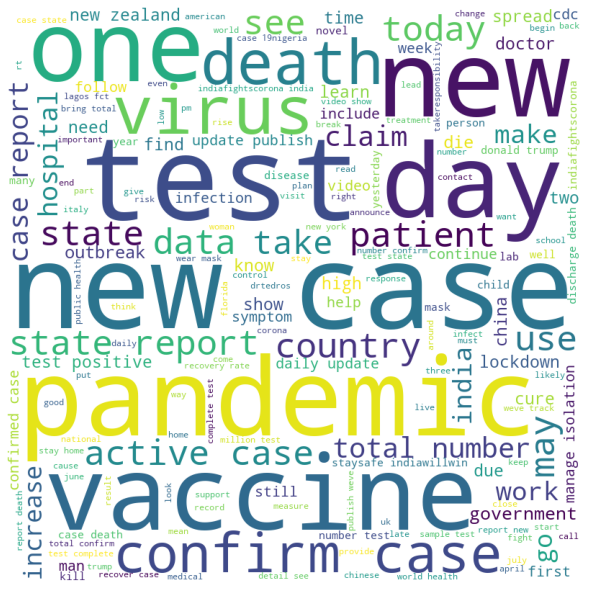

In [10]:
#Wordcloud on full data
generate_wordcloud(X)

In [11]:
#Split into fake and real
fakes = list(rawdata[rawdata['label']=='fake']['tweet'])
fakes = [' '.join(lemmatize_and_clean(tweet)) for tweet in fakes]

reals = list(rawdata[rawdata['label']=='real']['tweet'])
reals = [' '.join(lemmatize_and_clean(tweet)) for tweet in reals]

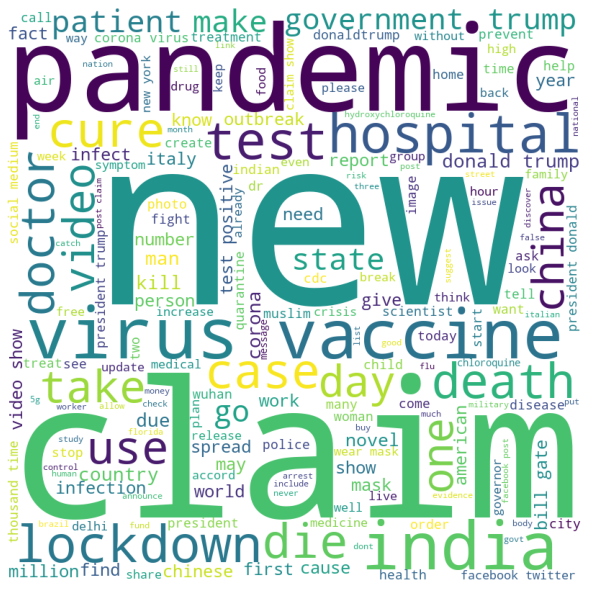

In [12]:
#Wordcloud on fake tweets
generate_wordcloud(fakes)

The top words for the fake tweets are "new" and "claims" which makes intuitive sense. There seem to be a lot of fake tweets related to the vaccine in particular, as well sa hospitals, doctors and lockdowns. Donald Trump also features prominently in the fake tweets. 

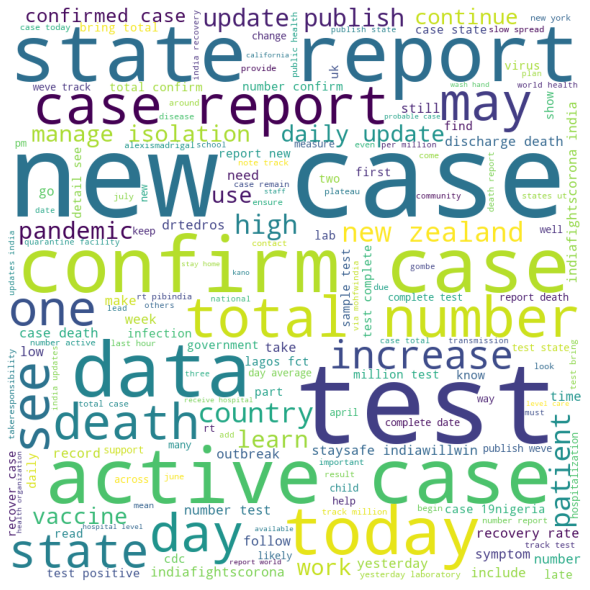

In [13]:
#Wordcloud on real tweets
generate_wordcloud(reals)

Clearly, from the way this data has been labelled, the real tweets are more associated with the "state" and "state reporting", as well as new case and active case data. Thus, the ML models will likely not be able to detect state-sponsored misinformation - an important policy consideration and potential source of bias in the seed data.

## Part 2: Vectorization, model training and evaluation

### 2.1 Split into test and training sets

In [14]:
# import the split function from sklearn
from sklearn.model_selection import train_test_split

# the outputs are already properly named, now call the split function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=66)

# You may run this line (this cell) multiple times to check if result is the same
print(X_train[:2])  

['police officer enforce lockdown order people temple india beaten', 'update number term compassionate exemption wait 2 people return test continue work enforcement service follow one person 40 return negative result 11 tested range reason']


### 2.2 Import and instantiate the feature extractors, then vectorize the training data

In [15]:
##Import the feature extractors
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# instantiate, fit and transform X_train with Count feature extractor
count_vect = CountVectorizer() #instantiate
count_vect = count_vect.fit(X_train) #fit
count_xtrain= count_vect.transform(X_train) #transform

# instantiate, fit and transform X_train with TFIDF feature extractor
tfidf_vect = TfidfVectorizer(analyzer='word', stop_words='english')
tfidf_vect = tfidf_vect.fit(X_train)
tfidf_xtrain = tfidf_vect.transform(X_train)

### 2.3 Use the feature extractors (fit on the training data) to transform the test data

In [16]:
count_xtest = count_vect.transform(X_test)
tfidf_xtest = tfidf_vect.transform(X_test)

#observe the shape of the test and training tweets
tfidf_xtrain.shape, tfidf_xtest.shape

((6420, 12585), (2140, 12585))

We define a helper function to assist with model evaluation, that returns a classification report for a given trained model input and vectorizer.

In [17]:
from sklearn.metrics import classification_report, accuracy_score

def evaluate(model, vectorizer='tfidf'): #accept either count or tfidf with tdidf as default
    assert(vectorizer in ['tfidf','count']), "Invalid vectorizer" 
    if(vectorizer == 'tfidf'):
        try:
            y_pred = model.predict(tfidf_xtest)
            print(classification_report(y_test, y_pred, digits=3))
        except TypeError: #some models need to take array-like data
            y_pred = model.predict(tfidf_xtest.toarray())
            print(classification_report(y_test, y_pred, digits=3))
    else: #if the vectorizer is count instead of tfidf
        try:
            y_pred = model.predict(count_xtest)
            print(classification_report(y_test, y_pred, digits=3))
        except TypeError:
            y_pred = model.predict(count_xtest.toarray())
            print(classification_report(y_test, y_pred, digits=3))

### Model Training

#### Logistic Regression

1. Logistic regression with **count** vectorization

In [18]:
# import the classifier
from sklearn.linear_model import LogisticRegression

# instantiate, and fit the feature matrix above into classifier
model_lr_count = LogisticRegression()
model_lr_count.fit(count_xtrain, y_train)
evaluate(model_lr_count, vectorizer="count")

              precision    recall  f1-score   support

        fake      0.927     0.951     0.939      1013
        real      0.955     0.933     0.943      1127

    accuracy                          0.941      2140
   macro avg      0.941     0.942     0.941      2140
weighted avg      0.941     0.941     0.941      2140



2. Logistic regression with **tfidf** vectorization

In [19]:
# instantiate, and fit the feature matrix above into classifier
model_lr_tfidf= LogisticRegression()
model_lr_tfidf.fit(tfidf_xtrain, y_train)
evaluate(model_lr_tfidf, vectorizer="tfidf")

              precision    recall  f1-score   support

        fake      0.910     0.939     0.924      1013
        real      0.943     0.917     0.930      1127

    accuracy                          0.927      2140
   macro avg      0.927     0.928     0.927      2140
weighted avg      0.928     0.927     0.927      2140



#### Naive Bayes 

3. Naive Bayes, Gaussian NB

In [20]:
from sklearn.naive_bayes import GaussianNB

# instantiate, and fit the feature matrix above into naive models
model_gnb = GaussianNB()
model_gnb.fit(count_xtrain.toarray(), y_train)
evaluate(model_gnb, vectorizer="count")

              precision    recall  f1-score   support

        fake      0.925     0.737     0.820      1013
        real      0.800     0.946     0.867      1127

    accuracy                          0.847      2140
   macro avg      0.862     0.842     0.844      2140
weighted avg      0.859     0.847     0.845      2140



4. Naive Bayes, Multinomial NB

In [21]:
from sklearn.naive_bayes import MultinomialNB

model_mnb = MultinomialNB()
model_mnb.fit(count_xtrain.toarray(), y_train)
evaluate(model_mnb, vectorizer="count")

              precision    recall  f1-score   support

        fake      0.916     0.924     0.920      1013
        real      0.931     0.924     0.927      1127

    accuracy                          0.924      2140
   macro avg      0.923     0.924     0.924      2140
weighted avg      0.924     0.924     0.924      2140



#### Random Forest
5. Random Forest Classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=200, random_state=0)
model_rf.fit(count_xtrain, y_train)
evaluate(model_rf, vectorizer="count")

              precision    recall  f1-score   support

        fake      0.909     0.936     0.922      1013
        real      0.941     0.916     0.928      1127

    accuracy                          0.925      2140
   macro avg      0.925     0.926     0.925      2140
weighted avg      0.926     0.925     0.925      2140



#### Support Vector Machine
6. SVM Classifier

In [23]:
from sklearn.svm import LinearSVC

model_svc = LinearSVC()
model_svc.fit(count_xtrain, y_train)
evaluate(model_svc, vectorizer="count")

              precision    recall  f1-score   support

        fake      0.921     0.934     0.927      1013
        real      0.940     0.928     0.934      1127

    accuracy                          0.931      2140
   macro avg      0.930     0.931     0.931      2140
weighted avg      0.931     0.931     0.931      2140



#### AdaBoost

7. AdaBoost Classifier

In [24]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

AdaBoost = AdaBoostClassifier(n_estimators=1000)
AdaBoost.fit(count_xtrain, y_train)
evaluate(AdaBoost, vectorizer="count")

              precision    recall  f1-score   support

        fake      0.912     0.925     0.919      1013
        real      0.932     0.920     0.926      1127

    accuracy                          0.922      2140
   macro avg      0.922     0.923     0.922      2140
weighted avg      0.923     0.922     0.922      2140



#### Simple Neural Network
- Demonstration purposes only

In [25]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from sklearn.preprocessing import LabelBinarizer

In [26]:
#Binarize labels, fake=0, real=1
encoder = LabelBinarizer()
encoder.fit(y_train)
y_train_nn = encoder.transform(y_train)
y_test_nn = encoder.transform(y_test)

print(y_train[0:3])
print(y_train_nn[0:3])

['fake', 'real', 'real']
[[0]
 [1]
 [1]]


In [27]:
#Vectorize with count (using keras Tokenizer)
tokenizer = Tokenizer(num_words=12586)
tokenizer.fit_on_texts(X_train)

X_train_nn = tokenizer.texts_to_matrix(X_train, mode='count')
X_test_nn = tokenizer.texts_to_matrix(X_test, mode='count')

X_train_nn.shape, y_train_nn.shape

((6420, 12586), (6420, 1))

In [28]:
#Build the RNN, sequential using dense layers only
model_seq = Sequential([
                        Dense(units=16, input_shape=(12586,), activation='relu'),
                        Dense(units=16, activation='relu'),
                        Dense(units=2, activation='sigmoid')
])
model_seq.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                201392    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 34        
Total params: 201,698
Trainable params: 201,698
Non-trainable params: 0
_________________________________________________________________


In [29]:
#Compile the model with Adam optimizer and sparse categorical cross-entropy loss
model_seq.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [30]:
#Train the model
model_seq.fit(x=X_train_nn, y=y_train_nn, validation_split=0.1, batch_size=10, epochs=20, shuffle=True, verbose=1)

Epoch 1/20
578/578 [==============================] - 3s 3ms/step - loss: 0.2778 - accuracy: 0.8880 - val_loss: 0.1813 - val_accuracy: 0.9268
Epoch 2/20
578/578 [==============================] - 2s 3ms/step - loss: 0.0694 - accuracy: 0.9765 - val_loss: 0.2060 - val_accuracy: 0.9252
Epoch 3/20
578/578 [==============================] - 2s 3ms/step - loss: 0.0190 - accuracy: 0.9946 - val_loss: 0.2364 - val_accuracy: 0.9221
Epoch 4/20
578/578 [==============================] - 2s 3ms/step - loss: 0.0065 - accuracy: 0.9990 - val_loss: 0.2858 - val_accuracy: 0.9174
Epoch 5/20
578/578 [==============================] - 2s 3ms/step - loss: 0.0019 - accuracy: 0.9998 - val_loss: 0.3087 - val_accuracy: 0.9190
Epoch 6/20
578/578 [==============================] - 2s 3ms/step - loss: 8.6432e-04 - accuracy: 1.0000 - val_loss: 0.3368 - val_accuracy: 0.9206
Epoch 7/20
578/578 [==============================] - 2s 3ms/step - loss: 4.6577e-04 - accuracy: 1.0000 - val_loss: 0.3643 - val_accuracy: 0.917

In [31]:
#Evaluate the model
y_pred = (model_seq.predict(X_test_nn) > 0.5).astype("int")[:,1]
print(classification_report(y_test_nn, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.930     0.917     0.923      1013
           1      0.926     0.938     0.932      1127

    accuracy                          0.928      2140
   macro avg      0.928     0.927     0.928      2140
weighted avg      0.928     0.928     0.928      2140



In [32]:
#Compare different models
performance = pd.read_csv('https://raw.githubusercontent.com/ltk2118/covid_misinformation/main/Model_Performance.csv', index_col='Metric')
performance

,Precision,Recall,F1,Acc
Metric,,,,
LR,0.928,0.953,0.940,0.943
LR-TFIDF,0.908,0.941,0.924,0.927
GNB,0.926,0.732,0.818,0.846
MNB,0.921,0.925,0.923,0.927
RF,0.908,0.938,0.923,0.926
SVM,0.919,0.933,0.926,0.929
AdaBoost,0.901,0.928,0.914,0.918
RNN,0.914,0.929,0.922,0.925


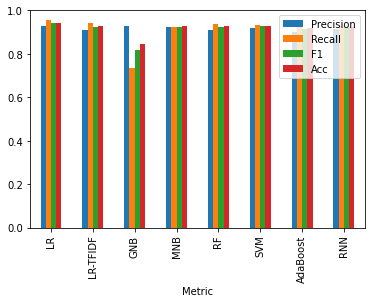

In [33]:
performance.plot(kind='bar')